# Regression Trees & Random Forest Regression

## Libraries and settings

In [12]:
# Libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/john/School/Sem5/DA/data_analytics/Week_08


## Import the apartment data

In [13]:
# Define columns for import
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number',
            'bfs_name',
            'pop',
            'pop_dens',
            'frg_pct',
            'emp',
            'mean_taxable_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched_cleaned.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head(5)

(722, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,mean_taxable_income,dist_supermarket
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49,0,1441,29.41,47.252171,8.845797,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,645.652248
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",3.0,111,0,2600,23.42,47.252087,8.854919,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,265.102153
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",3.0,58,0,1490,25.69,47.253670,8.853993,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,94.401821
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",4.0,118,0,3240,27.46,47.259834,8.851705,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,106.660970
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",3.0,66,0,1450,21.97,47.266113,8.866872,118,Rüti (ZH),12286,1221.272366,24.841283,5053,65362.04268,974.844209


## Regression Tree
See also: https://data36.com/regression-tree-python-scikit-learn

### Create train and test samples for the regression tree (train = 80%, test = 20% of the data)

In [3]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df[['area', 
                                                        'rooms',
                                                        'pop_dens',
                                                        'mean_taxable_income',
                                                        'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
     area  rooms     pop_dens  mean_taxable_income  dist_supermarket
456   120    6.5   165.018625          65380.98802       1958.318650
6      65    3.5   525.662252         111422.35870        282.095910
362    90    3.5   424.146342          72133.75058       2606.231069
594    63    2.5  1044.628957          70964.08794        564.607066
439    91    3.5   399.525129          62000.54187        646.823905 

y_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64


### Fit the regression tree model

In [4]:
# Create decision tree regressor object
reg = DecisionTreeRegressor(random_state=20, max_depth=3)

# Train decision tree regressor
reg = reg.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = reg.predict(X_test)

### Calculate coefficient of determination (R-squared)

In [5]:
# Calculate coefficient of determination
print('R-squared:', r2_score(y_test, y_pred).round(4))

R-squared: 0.4502


### Print text representation of the regression tree

In [6]:
# Text representation of the regression tree
text_representation = tree.export_text(reg, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation)

|--- area <= 99.50
|   |--- pop_dens <= 4269.10
|   |   |--- area <= 77.50
|   |   |   |--- value: [1722.86]
|   |   |--- area >  77.50
|   |   |   |--- value: [2191.39]
|   |--- pop_dens >  4269.10
|   |   |--- area <= 52.50
|   |   |   |--- value: [1893.80]
|   |   |--- area >  52.50
|   |   |   |--- value: [2927.78]
|--- area >  99.50
|   |--- area <= 134.00
|   |   |--- pop_dens <= 3874.83
|   |   |   |--- value: [2672.06]
|   |   |--- pop_dens >  3874.83
|   |   |   |--- value: [3603.59]
|   |--- area >  134.00
|   |   |--- pop_dens <= 1663.59
|   |   |   |--- value: [3391.42]
|   |   |--- pop_dens >  1663.59
|   |   |   |--- value: [4154.83]



### Vizualizing the regression tree

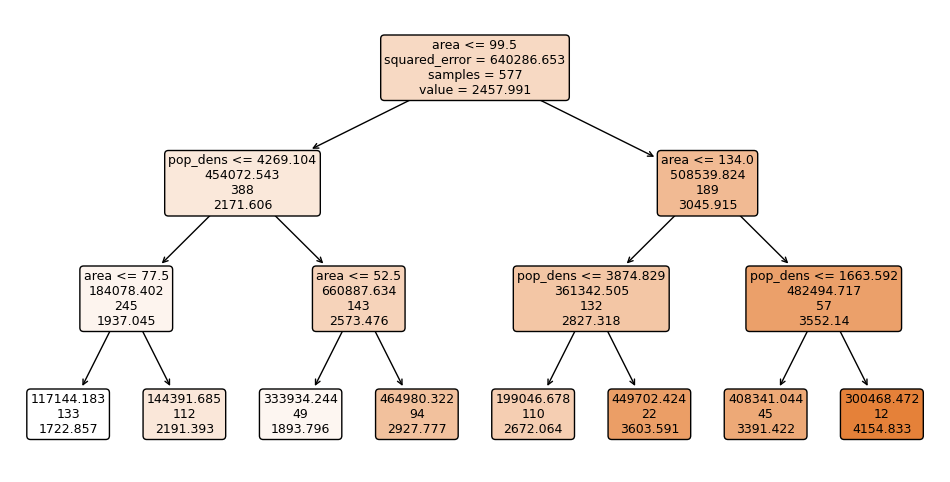

In [7]:
fig = plt.figure(figsize=(12,6))
_ = tree.plot_tree(reg, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'],
                   filled=True,
                   fontsize=9,
                   label='root',
                   rounded=True)

### SW08 - Task 2.B

#Change the parameter max_depth=3 to max_depth=5. This will change the depth (complexity) of the tree.

|--- area <= 99.50
|   |--- pop_dens <= 4269.10
|   |   |--- area <= 77.50
|   |   |   |--- rooms <= 1.25
|   |   |   |   |--- area <= 35.50
|   |   |   |   |   |--- value: [1153.83]
|   |   |   |   |--- area >  35.50
|   |   |   |   |   |--- value: [1325.00]
|   |   |   |--- rooms >  1.25
|   |   |   |   |--- area <= 69.50
|   |   |   |   |   |--- value: [1698.66]
|   |   |   |   |--- area >  69.50
|   |   |   |   |   |--- value: [1884.28]
|   |   |--- area >  77.50
|   |   |   |--- mean_taxable_income <= 96728.41
|   |   |   |   |--- pop_dens <= 1030.49
|   |   |   |   |   |--- value: [1995.61]
|   |   |   |   |--- pop_dens >  1030.49
|   |   |   |   |   |--- value: [2257.40]
|   |   |   |--- mean_taxable_income >  96728.41
|   |   |   |   |--- mean_taxable_income <= 166929.42
|   |   |   |   |   |--- value: [2604.00]
|   |   |   |   |--- mean_taxable_income >  166929.42
|   |   |   |   |   |--- value: [3055.00]
|   |--- pop_dens >  4269.10
|   |   |--- area <= 52.50
|   |   |   |---

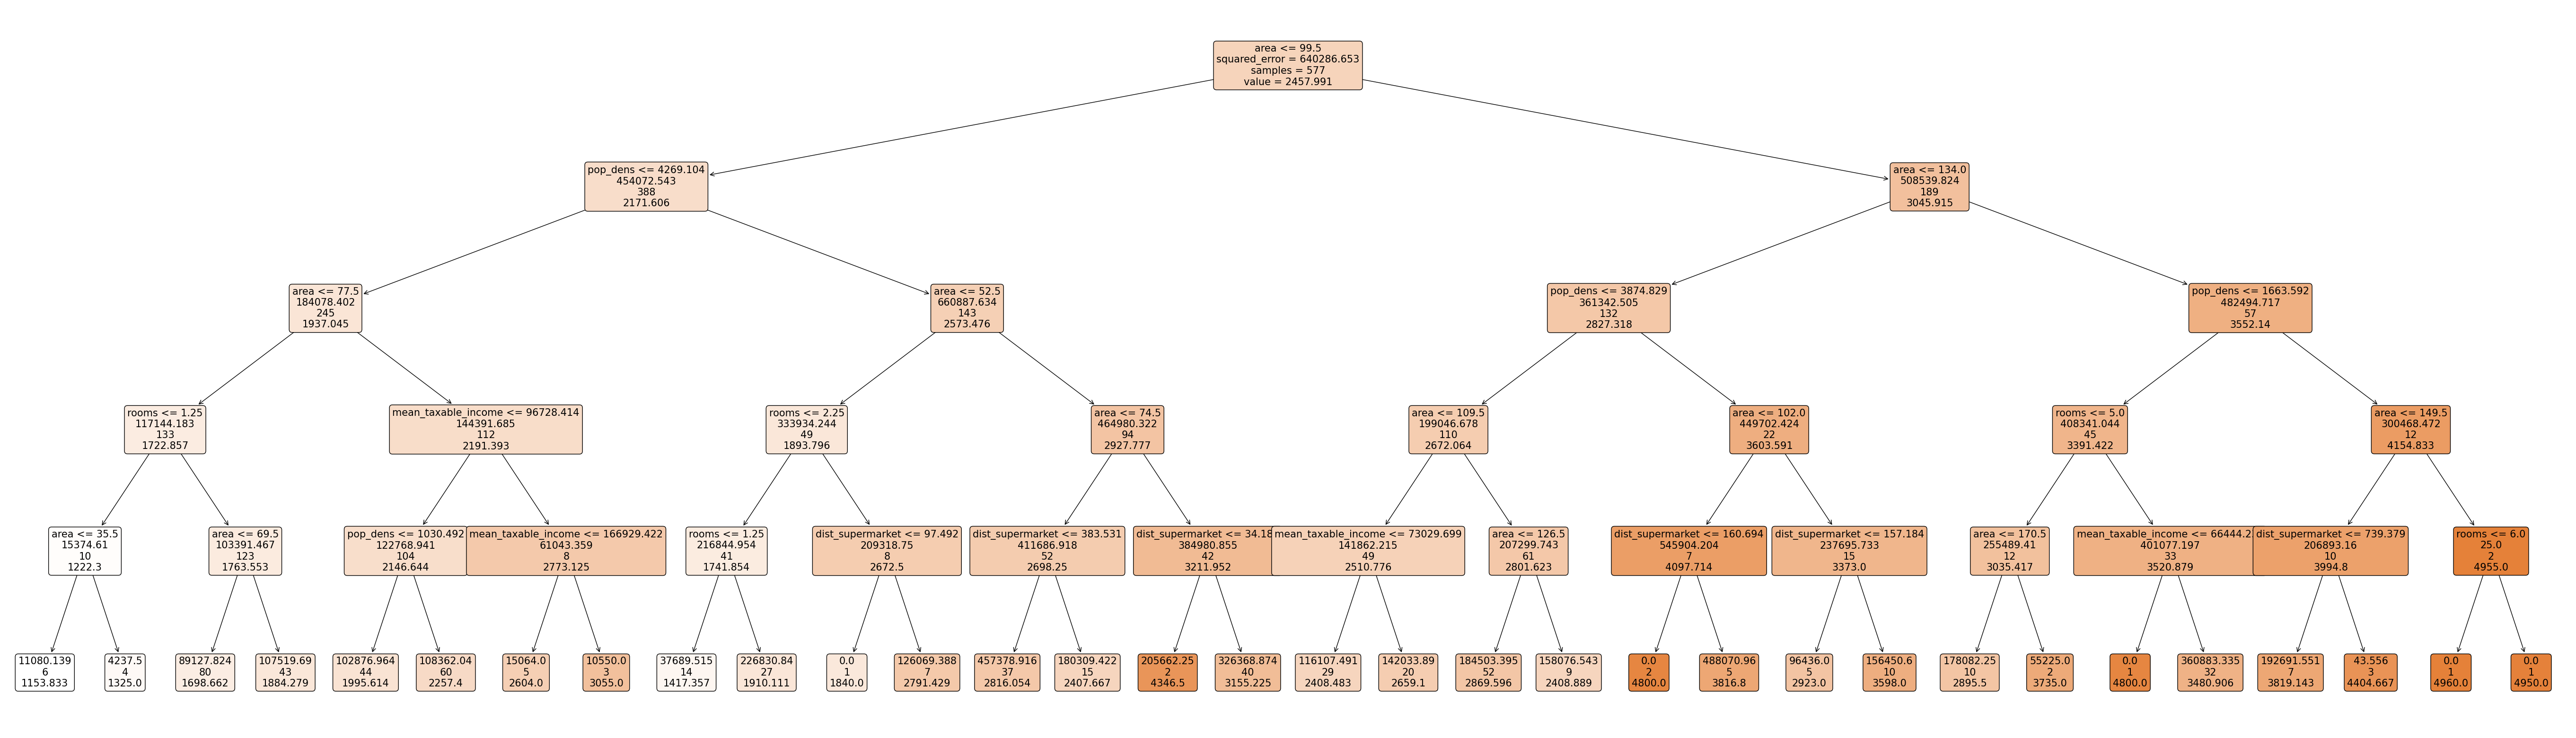

In [25]:
# Create decision tree regressor object
reg1 = DecisionTreeRegressor(random_state=20, max_depth=5)

# Train decision tree regressor
reg1 = reg1.fit(X_train, y_train)

# Predict the response for test dataset
y_pred1 = reg1.predict(X_test)

# Text representation of the regression tree
text_representation1 = tree.export_text(reg1, 
                                       feature_names=list(X_train.columns))

# Print text_representation
print(text_representation1)

fig = plt.figure(figsize=(70,20))
_ = tree.plot_tree(reg1, 
                   feature_names=list(X_train.columns),  
                   class_names=['price'],
                   filled=True,
                   fontsize=15,
                   label='root',
                   rounded=True)

### Compare the output (text and graphic) with the output of the original regression tree (in which max_depth=3)
Dd you see any differences ? 


Yes, there are some difference.
It looks more complicated with the 2 additional depth instead of 3.

### SW08 Task 2.C Change parameter and coefficient of determinated (R-Squared)
Drop the two varaibels AREA and ROOMS from the train and test samples. Run the Jupyter notebook again.

In [26]:
# Create train and test samples
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[[
                                                        'pop_dens',
                                                        'mean_taxable_income',
                                                        'dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X_train
print('X_train2:')
print(X_train2.head(), '\n')

# Show y_train
print('y_train2:')
print(y_train2.head())

###################################### Fit the regression tree model ########################################################################

# Create decision tree regressor object
reg2 = DecisionTreeRegressor(random_state=20, max_depth=3)

# Train decision tree regressor
reg2 = reg2.fit(X_train2, y_train2)


###################################### Calculate coefficient of determination (R-squared) ########################################################################
# Predict the response for test dataset
y_pred2 = reg2.predict(X_test2)


# Calculate coefficient of determination
print('R-squared:', r2_score(y_test2, y_pred2).round(4))

X_train2:
        pop_dens  mean_taxable_income  dist_supermarket
456   165.018625          65380.98802       1958.318650
6     525.662252         111422.35870        282.095910
362   424.146342          72133.75058       2606.231069
594  1044.628957          70964.08794        564.607066
439   399.525129          62000.54187        646.823905 

y_train2:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64
R-squared: 0.0504


### Does the R-Squared value cahange ? If so, explain why? 
<p>

Well compared with the origianl R-Squared value (0.4502), the new value (0.0504), is much worst than before. That means those two variables (area & area) are a strong predictor which has a huge impact of the model/calculation.
In conclusion, we should add this 2 variables back to our model =)
</p>

## Random Forest Regression
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### Create train and test samples for the random forest (train = 80%, test = 20% of the data)

In [14]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area', 
                                                            'rooms',
                                                            'pop_dens',
                                                            'mean_taxable_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area  rooms     pop_dens  mean_taxable_income  dist_supermarket
456   120    6.5   165.018625          65380.98802       1958.318650
6      65    3.5   525.662252         111422.35870        282.095910
362    90    3.5   424.146342          72133.75058       2606.231069
594    63    2.5  1044.628957          70964.08794        564.607066
439    91    3.5   399.525129          62000.54187        646.823905 

y2_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64


### Fit the Random Forest Regression

In [15]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg_rf.fit(X2_train, y2_train)

# Calculate coefficient of determination (R-squared)
print('R-squared:', reg_rf.score(X2_test, y2_test).round(4))

R-squared: 0.5481


### Show feature importance

Index(['area', 'pop_dens', 'dist_supermarket', 'mean_taxable_income', 'rooms'], dtype='object')
[0.56749536 0.16751781 0.11611526 0.09147853 0.05739305]


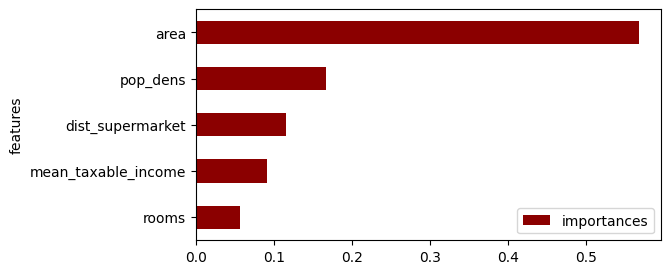

In [16]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = reg_rf.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

plt.show()

### SW08. Task 2d / 2e
Drop the variable area and run the jupyter notebook again

X3_train:
     rooms     pop_dens  mean_taxable_income  dist_supermarket
456    6.5   165.018625          65380.98802       1958.318650
6      3.5   525.662252         111422.35870        282.095910
362    3.5   424.146342          72133.75058       2606.231069
594    2.5  1044.628957          70964.08794        564.607066
439    3.5   399.525129          62000.54187        646.823905 

y3_train:
456    1900
6      1850
362    2090
594    2102
439    1800
Name: price, dtype: int64
R-squared: 0.3215
Index(['area', 'mean_taxable_income', 'pop_dens', 'rooms'], dtype='object')
[0.39736226 0.27042968 0.17860647 0.15360159]


<Axes: ylabel='features'>

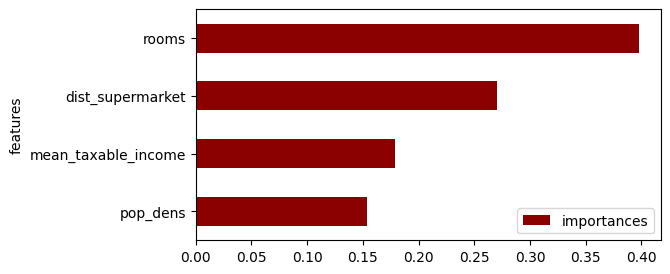

In [29]:
# Create train and test samples (the names X2_ and y2_ were used because X_ and y_ were already used above)
X3_train, X3_test, y3_train, y3_test = train_test_split(df[[
                                                            'rooms',
                                                            'pop_dens',
                                                            'mean_taxable_income',
                                                            'dist_supermarket']], 
                                                            df['price'], 
                                                            test_size=0.20, 
                                                            random_state=42)

# Show X3_train
print('X3_train:')
print(X3_train.head(), '\n')

# Show y3_train
print('y3_train:')
print(y3_train.head())


#################

X, y = make_regression(n_features=4, n_informative=2,
                       random_state=5, shuffle=False)


reg_rf2 = RandomForestRegressor(n_estimators=500, 
                               max_depth=10, 
                               random_state=5)
reg_rf2.fit(X3_train, y3_train)

# Calculate coefficient of determination (R-squared)
print('R-squared:', reg_rf2.score(X3_test, y3_test).round(4))


#################### Show feature importance ####################


cols2 = X3_train.columns

# Derive feature importance from random forest
importances = reg_rf2.feature_importances_
std         = np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)
indices     = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols2,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))


### Task 2.f Does the importance of features cahnges ? If yes, explain why ? 

<p> First the R-squared droped from 0.5481 (origin value) to 0.3215, which indicates that this actuall model is more worst than the one before.
2nd. Removing the essential predictor/feature (area), cause a shifting / redistribution of the importances of the other features.
</p>

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [17]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.0.0
Datetime: 2023-11-17 11:31:35
Python Version: 3.9.6
-----------------------------------
